In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import plotFigureGray, plotFigure

### Image Thresholding

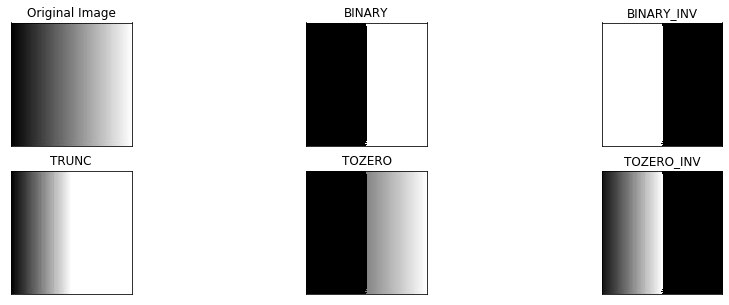

In [2]:
img = cv2.imread('input/gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

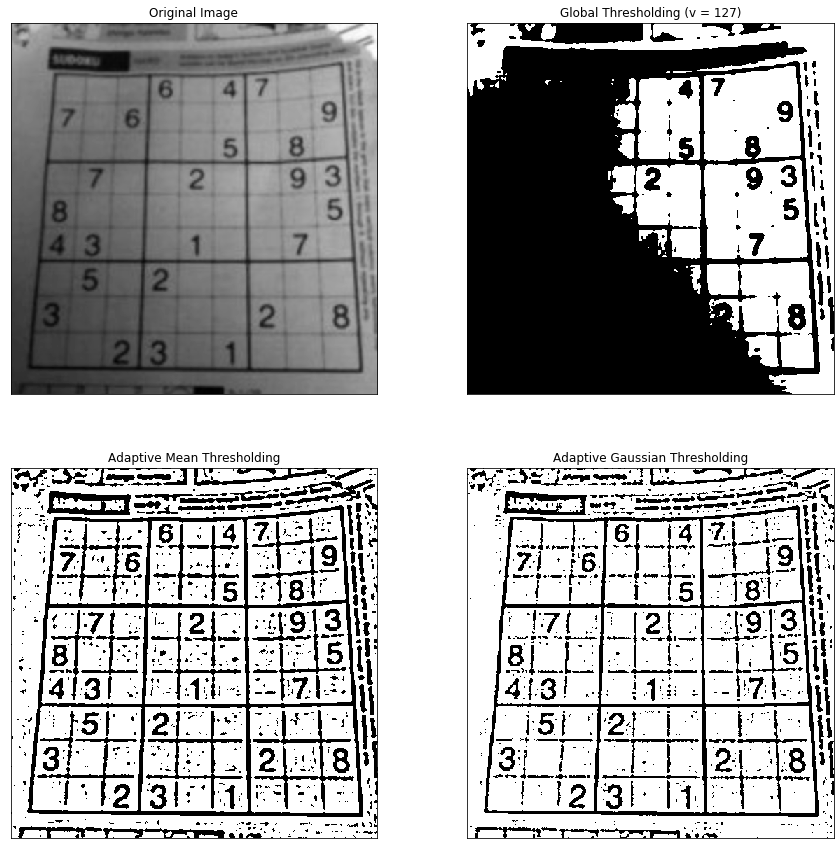

In [3]:
# Python: cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst


img = cv2.imread('input/histogram.png',0)
#img = cv2.medianBlur(img,5)
img = cv2.GaussianBlur(img,(5,5),0)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(15, 15))

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Morphological Transformations

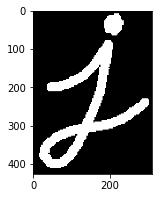

In [4]:
img = cv2.imread('input/j.png',0)
kernel = np.ones((5,5),np.uint8)
plotFigureGray(img)
plt.show()

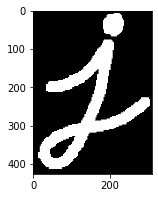

In [5]:
dilate = cv2.dilate(img,kernel,iterations = 1)
plotFigureGray(dilate)
plt.show()

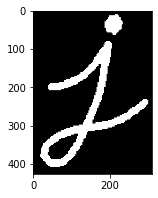

In [6]:

erosion = cv2.erode(img,kernel,iterations = 1)
plotFigureGray(erosion)
plt.show()

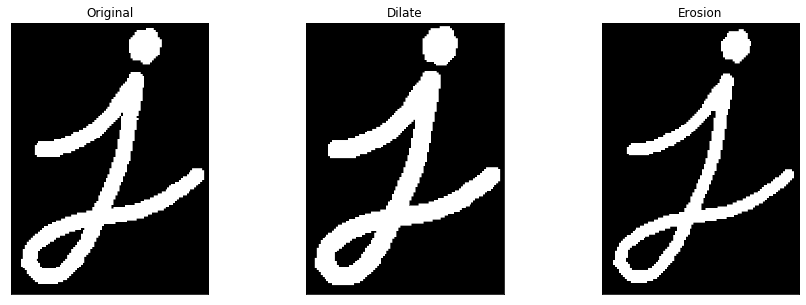

In [7]:
images = [img, dilate, erosion]
titles = ['Original', 'Dilate', 'Erosion']
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

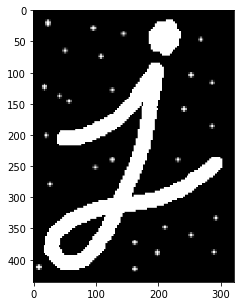

In [8]:
img = cv2.imread('input/j-noise.png',0)
kernel = np.ones((5,5),np.uint8)
plotFigureGray(img,5)
plt.show()

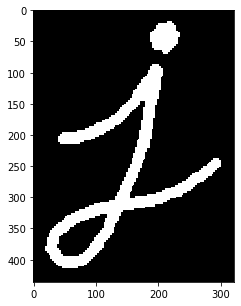

In [9]:
ret,thresh1 = cv2.threshold(img,200,255,cv2.THRESH_BINARY)
erosion = cv2.erode(thresh1,kernel,iterations = 1)
plotFigureGray(erosion,5)
plt.show()

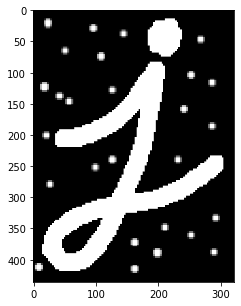

In [10]:
dilate = cv2.dilate(img,kernel,iterations = 1)
plotFigureGray(dilate,5)
plt.show()

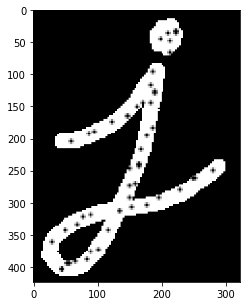

In [11]:
img = cv2.imread('input/j-noise-in.png',0)
kernel = np.ones((5,5),np.uint8)
plotFigureGray(img,5)
plt.show()

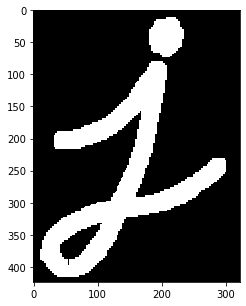

In [12]:
ret,img = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
dilate = cv2.dilate(img,kernel,iterations = 1)
plotFigureGray(dilate,5)
plt.show()

### Opening is just another name of erosion followed by dilation. 
It is useful in removing noise, as we explained above.
Here we use the function, cv2.morphologyEx()

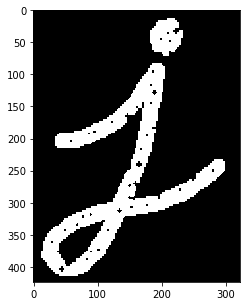

In [13]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plotFigureGray(opening,5)
plt.show()


### Closing is reverse of Opening, Dilation followed by Erosion. 
It is useful in closing small holes inside the foreground
objects, or small black points on the object.

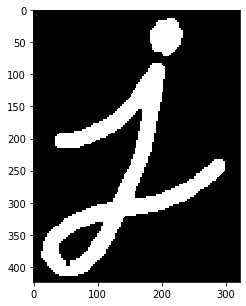

In [14]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plotFigureGray(closing,5)
plt.show()

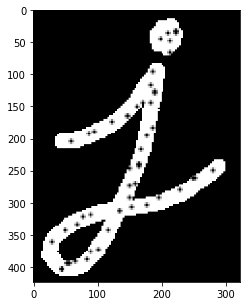

In [15]:
img = cv2.imread('input/j-noise-in.png',0)
kernel = np.ones((5,5),np.uint8)
plotFigureGray(img,5)
plt.show()

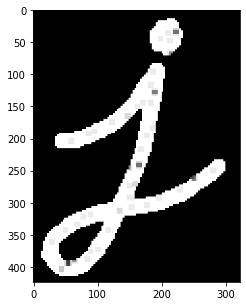

In [16]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plotFigureGray(closing,5)
plt.show()